<a href="https://colab.research.google.com/github/carolina-garay/M_Espacios_Verdes_2022_Grupo1/blob/TP2_EyCD_Garay/EyCD_MEV_Garay_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mentoria: Monitoreo de Espacios Verdes

__DIPLODATOS 2022 - FAMAF UNC__

_Felix Rojo Lapalma_

## Exploración y Curación de Datos 

_GRUPO1_

Alumnos

- Artola, María Fernanda
- Garay, Carolina
- Ormaechea, Sebastián


En esta etapa ya hemos avanzado en (basados en el [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)):

- análisis y exploración del conjunto de datos (aunque sea superficialmente)
- set representativo: Es decir, aprendimos que podemos llegar a trabajar con un set mas reducido (de las caracteristicas - columnas del dataframe) e igualmente vamos a estar representando gran parte del conjunto.
- inputacion de valores:   
    - tenemos formas de inputar valores en rangos temporales que no tenemos (para una cierta zona) utilizando otros rangos temporales (aqui aprovechamos fuertemente la estacionalidad de lo que estamos monitoreando)
    - que un outlier en un rango temporal puede ser un valor nominal en otro rango temporal.

- etc

En lo que sigue vamos a aplicar mucho de lo obtenido en el TP anterior para "curar" nuestro dataset con diferentes recetas. Por curar nos referimos a generar los procesos necesarios (trazables y reproducibles) que nos lleven del conjunto original de datos (que debe permanecer inmutable) hasta un conjunto que pueda ser consumido por distintos algorimos de aprendizaje. Las recetas pasaran de las mas simples, hasta algunas mas elaboradas. Una de las intenciones de todo proceso de curacion es salvar, en base a ciertos supuestos, la mayor cantidad de datos (puesto que la recoleccion de los mismos, etc, suele ser un proceso costoso tanto en recursos como en tiempo, entre otras cosas).

### Fuentes

El presente trabajo práctico está inspirado en los correspondientes de:

- [jbergamasco2019](https://github.com/jbergamasco/DiploDatos2019)

- [TP-Analisis-Visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/notebooks-tp/Analisis-y-Visualizacion-MEV-TP.ipynb)

Para una introducción un poco mas extensa respecto al origen de los datos y su procesamiento se pueden referir a :
- [ab-initio-data-build](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md)
- [ab-initio-analisis-visualizacion](https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-analisis-visualizacion.md)


## Sobre el Trabajo Requerido

Se propone la elaboración de un conjunto de procedimientos (\*.py o notebooks) que nos permitan partiendo del dataset original obtener uno nuevo y "curado".
Respecto a las recetas mencionadas, son las que van a dar origen a los distintos procedimientos y nos van a permitir inferir (ya en el proximo TP) la importancia del proceso de curación.

### Sobre las recetas

La idea de construccion de una receta es que pueda ser aprovechada cuando le llegue un set nuevo de datos. Tanto  para su transformacion para incorporarlos al set de entramiento como para su posible uso en inferencia.

__DISCLAIMER__: En lo siguiente vamos a presentar un numero limitado (~4) de recetas (para el problema en cuestión).

### ab-initio

- elija (basados en lo aprendido en el TP anterior) un conjunto de bandas e indices que considere representativo. Adicione a su elección:
    - raster: raster del cual se extraen los estadísticos
    - clouds_on_raster: nubosidad del raster completo
    - osm_id: identificador asociado a la capa original (atlas-espacios-verdes)
    - area_m2: area en metros cuadrados
    - date: fecha de la muestra.
    
    estas variables las sumamos a los efectos practicos de representacion y filtrado.



### [A] Esfuerzo Nulo

- Leer los datos

In [5]:
# Setup necesario para correr pandas profiling
#!pip install pandas_profiling==2.8.0
#!pip install pandas==1.2.0
########################################
# Importación necesaria para correr pandas profiling y descargar reporte
#from pandas_profiling import ProfileReport
from google.colab import files
########################################
# Descarga de base de datos
# from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
########################################
!pip install gdown
!pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# Descarga de archivo
!gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy

Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: /content/espacios-verdes-indexs-cba-20170101-20220420.zip
100% 170M/170M [00:04<00:00, 37.9MB/s]


In [75]:
# Carga de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.dates as mdates # Esto sirve para manipular fechas en los gráficos
import matplotlib.pyplot as plt
import datetime


In [76]:
# Lectura de csv y obtención de dataframe 
df_=pd.read_csv("/content/espacios-verdes-indexs-cba-20170101-20220420.zip", index_col=0)
df_

,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
0,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032,2017-01-03
1,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513,2017-01-03
2,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528,2017-01-03
3,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640,2017-01-03
4,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048,2017-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.0990,0.1684,0.115990,0.11270,0.0,0.0694,31,0.0862,0.1627,0.107387,...,0.892669,0.0,0.545993,31,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307532496,NaN,3824.467794,2022-04-17
208928,0.1145,0.3240,0.149746,0.13665,0.0,0.2095,80,0.0977,0.3363,0.149332,...,1.084102,0.0,2.805242,80,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307535460,Plaza Exodo Jujeño,7184.535857,2022-04-17
208929,0.0993,0.1388,0.110870,0.10625,0.0,0.0395,10,0.0930,0.1473,0.106160,...,0.914887,0.0,0.199024,10,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307796387,NaN,1147.997645,2022-04-17
208930,0.0991,0.1407,0.124008,0.12570,0.0,0.0416,53,0.0852,0.1377,0.118574,...,0.991200,0.0,0.299910,53,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307097955,NaN,5185.690046,2022-04-17


In [8]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208932 entries, 0 to 208931
Columns: 167 entries, B02_min to date
dtypes: float64(140), int64(24), object(3)
memory usage: 267.8+ MB


- Extraer las columnas de interes (## ab-initio)

In [9]:
# Creamos un nuevo dataframe con las columnas de interés 
df_interest = df_[["B02_median", "B06_median", "B11_median","osm_id", "date", "ndvi_max", "area_m2","raster","clouds_on_raster"]]
len(df_interest)

208932

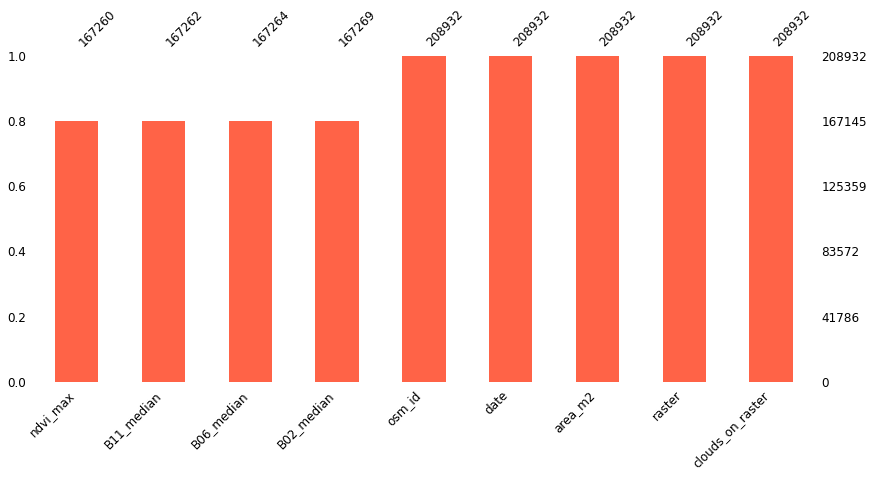

In [10]:
# Utilizamos la librería missingno para el análisis de datos faltantes 
import missingno as msno
# Graficamos los datos faltantes de varias variables, incluidas las de interés
msno.bar(df_interest,figsize=(14, 6), sort="ascending",fontsize=12, color='tomato') 

- Desechar valores nulos

In [11]:
# Desechamos valores nulos de las columnas de interés y generamos nuevo dataframe 
df_interest_A1=df_interest.dropna(subset=["B02_median","B06_median","B11_median"])

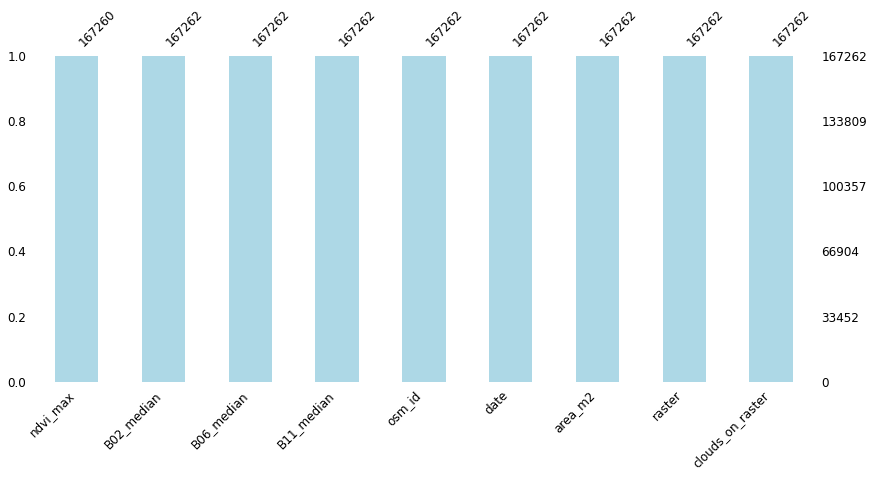

In [12]:
# Graficamos nuevamente y observamos que ya no hay presentes valores nulos
msno.bar(df_interest_A1,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue') 

- Filtrar por nubosidad < 10%

In [13]:
# Filtramos por nubosidad < 10% y creamos nuevo dataframe
print(df_interest_A1.clouds_on_raster.value_counts())

df_interest_A2=df_interest_A1[df_interest_A1['clouds_on_raster']<0.1]
len(df_interest_A2)

0.000000     110639
0.325822        757
0.212517        757
0.533689        757
0.622331        757
              ...  
98.880824        25
98.602103        18
92.987497        13
89.006244         8
93.299774         2
Name: clouds_on_raster, Length: 105, dtype: int64


114424

- Remocion de Outliers (a nivel general sin considerar estacionalidad)

Para remover outliers, primero definimos una función que genere nuevas columnas que diferencien outliers (valor=1), del resto de los registros (valor=0).
Luego, para la eliminación de outliers, aplicamos el criterio de quitar aquellos registros donde se observa que para las tres bandas bajo análisis (columnas), los valores son outliers (valor=1).  

In [15]:
def find_outliers(df, col_list):
    # calculamos cuartiles 1 y 3, y el interquartil (iqr)
    for col in col_list:
        if col=="NaN":
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1 
        # calculamos límite superior e inferior
        ls = q1 + 1.5 * iqr
        li = q3 - 1.5 * iqr
        # Generamos nueva columna
        df['outl_'+col]=  np.where((df[col] >ls)| (df[col] < li),1,0)

In [16]:
bandas = ['B02_median', 'B06_median', 'B11_median']
find_outliers(df_interest_A2, bandas)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [17]:
df_interest_A2

,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,outl_B02_median,outl_B06_median,outl_B11_median
0,0.09650,0.19910,0.18770,605976736,2017-01-03,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,0,0
1,0.10660,0.25960,0.25420,559322368,2017-01-03,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,1,0
2,0.11290,0.25550,0.24640,559322369,2017-01-03,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,0,0
3,0.11355,0.29300,0.26675,559328111,2017-01-03,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,1,0
4,0.12240,0.29460,0.28950,559328112,2017-01-03,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,2022-04-17,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0
208928,0.13665,0.23835,0.27315,307535460,2022-04-17,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0
208929,0.10625,0.22425,0.22230,307796387,2022-04-17,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0
208930,0.12570,0.20880,0.25450,307097955,2022-04-17,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,0,0,0


In [18]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis, los valores son outliers
df_interest_A3 = df_interest_A2[~((df_interest_A2['outl_B02_median']==1) & (df_interest_A2['outl_B06_median']==1) & (df_interest_A2['outl_B11_median']==1))]
len(df_interest_A3)

112391

- Grabar los datos transformados

In [19]:
# Aquí está faltando el paso de grabar los resultados

### Receta [B] Imputacion General + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [44]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_B1 = df_interest.copy()
len(df_interest_B1)

208932

- Remoción de Outliers (a nivel general sin considerar estacionalidad)

In [45]:
# Aplicamos la función desarrollada anteriormente
find_outliers(df_interest_B1, bandas)
# Removemos outliers
df_interest_B2 = df_interest_B1[~((df_interest_B1['outl_B02_median']==1) & (df_interest_B1['outl_B06_median']==1) & (df_interest_B1['outl_B11_median']==1))]
len(df_interest_B2)

200681

- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


200681


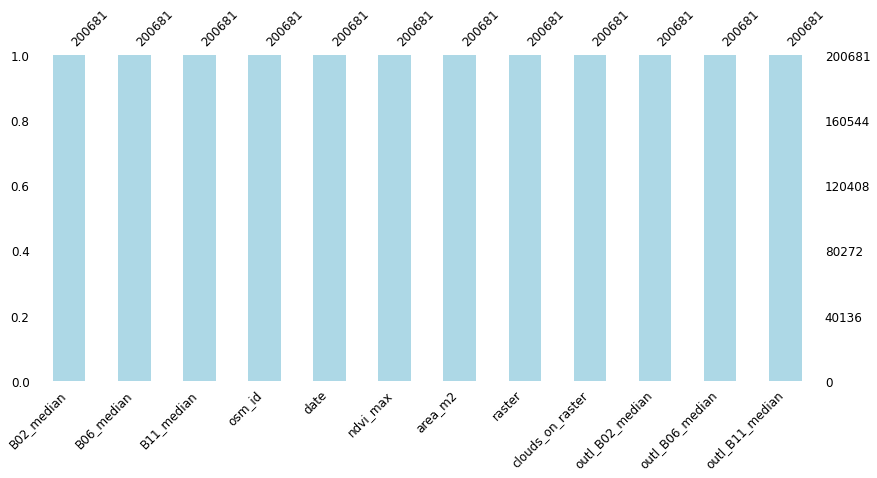

In [46]:
# Imputamos valores nulos bajo el criterio del vecino más cercano
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

df_interest_B3 = df_interest_B2.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_interest_B3[['ndvi_max','B02_median', 'B06_median', 'B11_median']] = kn_imputer.fit_transform(df_interest_B3[['ndvi_max','B02_median', 'B06_median', 'B11_median']])
print(len(df_interest_B3))
msno.bar(df_interest_B3,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

- Filtrar por nubosidad < 10%

In [47]:
# Filtrar por nubosidad < 10%
df_interest_B4=df_interest_B3[df_interest_B3['clouds_on_raster']<0.1]
len(df_interest_B4)

114497

- Grabar los datos transformados

In [48]:
# Aquí está faltando el paso de grabar los resultados

### Receta [C] Imputacion Estacional + Filtrado Por Nubosidad 

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [25]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_C1 = df_interest.copy()
len(df_interest_C1)

208932

- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [26]:
# Para la remoción de outliers por estación, defiinimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_C1['date']= pd.to_datetime(df_interest_C1['date'])

# Extraemos el mes de cada registro.
df_interest_C1['month'] = df_interest_C1['date'].dt.month

# Aplicamos la siguiente función para determinar la estación a la que corresponde cada registro.
def seasons(df, col):
    Seasons = []
    for month in df[col]:
        if month in (1, 2, 3):
            season = 'summer'
        elif month in (4, 5, 6):
            season = 'autumn'
        elif month in (7, 8, 9):
            season = 'winter'
        else:
            season = 'spring'
        Seasons.append(season)
    df["season"]= Seasons

seasons(df_interest_C1, "month")
df_interest_C1

,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season
0,0.09650,0.19910,0.18770,605976736,2017-01-03,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
1,0.10660,0.25960,0.25420,559322368,2017-01-03,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
2,0.11290,0.25550,0.24640,559322369,2017-01-03,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
3,0.11355,0.29300,0.26675,559328111,2017-01-03,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
4,0.12240,0.29460,0.28950,559328112,2017-01-03,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,2022-04-17,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208928,0.13665,0.23835,0.27315,307535460,2022-04-17,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208929,0.10625,0.22425,0.22230,307796387,2022-04-17,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208930,0.12570,0.20880,0.25450,307097955,2022-04-17,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn


In [27]:
# Generamos nuevas columnas de cada banda para cada estación
df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B02_summer'] = df_interest_C1['B02_median']  
df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B02_autumn'] = df_interest_C1['B02_median']
df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B02_winter'] = df_interest_C1['B02_median']
df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B02_spring'] = df_interest_C1['B02_median']

df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B06_summer'] = df_interest_C1['B06_median']  
df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B06_autumn'] = df_interest_C1['B06_median']
df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B06_winter'] = df_interest_C1['B06_median']
df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B06_spring'] = df_interest_C1['B06_median']

df_interest_C1.loc[df_interest_C1['season'] == 'summer', 'B11_summer'] = df_interest_C1['B11_median']  
df_interest_C1.loc[df_interest_C1['season'] == 'autumn', 'B11_autumn'] = df_interest_C1['B11_median']
df_interest_C1.loc[df_interest_C1['season'] == 'winter', 'B11_winter'] = df_interest_C1['B11_median']
df_interest_C1.loc[df_interest_C1['season'] == 'spring', 'B11_spring'] = df_interest_C1['B11_median']

In [28]:
# Creamos lista de nuevas columnas para usarla como argumento en la función que detecta outliers
Season_values = ['B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']

# Aplicamos la función de detección de outliers
find_outliers(df_interest_C1, Season_values)

In [29]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_E2_summer = df_interest_C1[~((df_interest_C1['outl_B02_summer']==1) & (df_interest_C1['outl_B06_summer']==1) & 
                        (df_interest_C1['outl_B11_summer']==1))]
print(len(df_interest_E2_summer))

df_interest_E2_autumn = df_interest_E2_summer[~((df_interest_C1['outl_B02_autumn']==1) & 
                        (df_interest_E2_summer['outl_B06_autumn']==1) & (df_interest_E2_summer['outl_B11_autumn']==1))]
print(len(df_interest_E2_autumn))

df_interest_E2_winter = df_interest_E2_autumn[~((df_interest_C1['outl_B02_winter']==1) & 
                        (df_interest_E2_autumn['outl_B06_winter']==1) & (df_interest_E2_autumn['outl_B11_winter']==1))]
print(len(df_interest_E2_winter))

df_interest_E2_spring = df_interest_E2_winter[~((df_interest_C1['outl_B02_spring']==1) & 
                        (df_interest_E2_winter['outl_B06_spring']==1) & (df_interest_E2_winter['outl_B11_spring']==1))]
print(len(df_interest_E2_spring))

205669
202722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


200130
197680


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


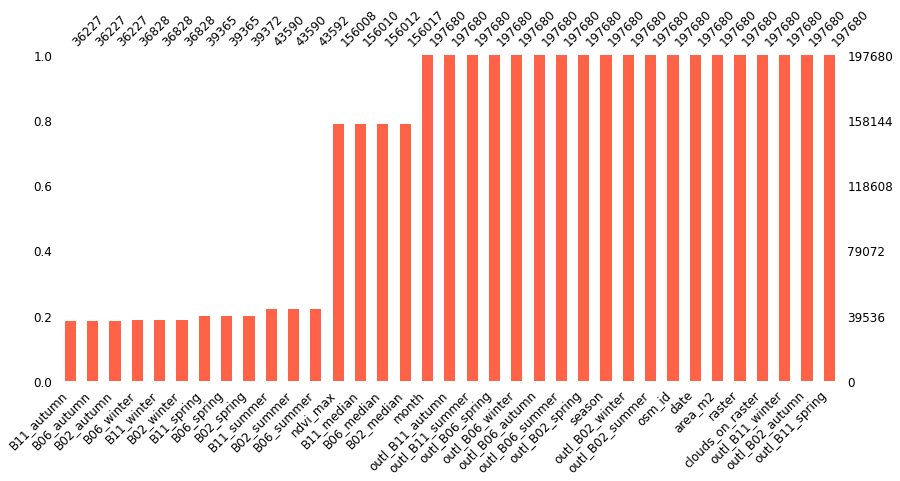

In [30]:
msno.bar(df_interest_C2_spring,figsize=(14, 6), sort="ascending",fontsize=12, color='tomato')

- Imputar valores nulos (a nivel estacional - definir el criterio, o estadistico, _media_, _mediana_, etc)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


197680


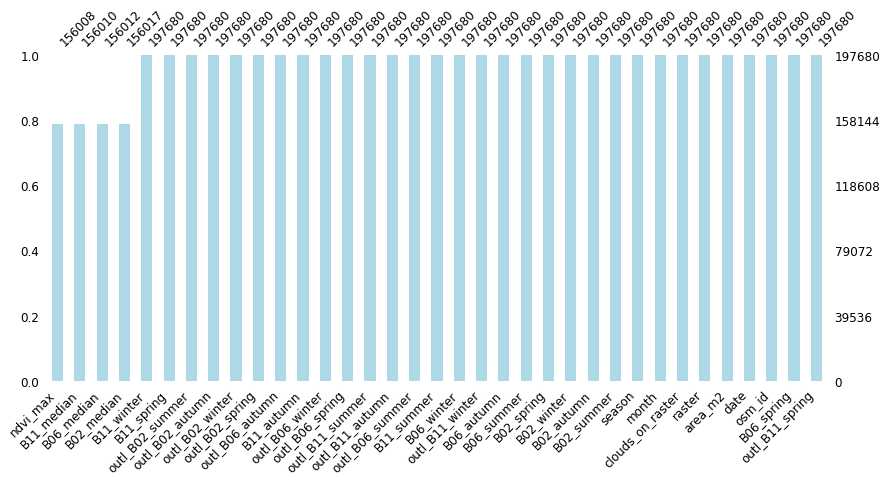

In [31]:
# Imputamos valores nulos a nivel estacional bajo el criterio del vecino más cercano
df_interest_C3 = df_interest_C2_spring.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_interest_C3[Season_values] = kn_imputer.fit_transform(df_interest_C3[Season_values])

print(len(df_interest_C3))
msno.bar(df_interest_C3,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')


- Filtrar por nubosidad:
    - < 20%
    - < 40%

In [32]:
# Filtramos por nubosidad < 20% y luego < 40%
df_interest_C4_20 = df_interest_C3[df_interest_C3['clouds_on_raster']<0.2]
print(len(df_interest_C4_20))
df_interest_C4_40 = df_interest_C3[df_interest_C3['clouds_on_raster']<0.4]
print(len(df_interest_C4_40))


115009
117969


- Grabar los datos transformados

In [33]:
# Aquí está faltando el paso de grabar los resultados

### Receta [D] Imputacion Estacional + Filtrado Por Nubosidad + Normalizacion 

__NOTA__: Para ciertos algoritmos puede ser necesario normalizar los datos (para facilitar su convergencia). Se le ocurre alguna forma de hacerlo? (Existen muchas alternativas, elija alguna de ellas - justificando su eleccion). Utilizando alguna que le parezca interesante, actualice la siguiente receta basada en [C]

- Leer los datos
- Extraer las columnas de interes (## ab-initio)

In [34]:
# Dado que la lectura de datos y extracción de columnas ya se realizó anteriormente, generamos un nuevo dataframe para 
# procesar, en base a df_interest. Este contiene las columnas de interés pero sin ningún procesamiento.
df_interest_D1 = df_interest.copy()
len(df_interest_D1)

208932

- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [35]:
# Para la remoción de outliers por estación, defiinimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_D1['date']= pd.to_datetime(df_interest_D1['date'])

# Extraemos el mes de cada registro.
df_interest_D1['month'] = df_interest_D1['date'].dt.month

# Aplicamos la función (seasons)creada anteriormente para determinar la estación a la que corresponde cada registro.
seasons(df_interest_D1, "month")

# Generamos nuevas columnas de cada banda para cada estación
df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B02_summer'] = df_interest_D1['B02_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B02_autumn'] = df_interest_D1['B02_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B02_winter'] = df_interest_D1['B02_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B02_spring'] = df_interest_D1['B02_median']

df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B06_summer'] = df_interest_D1['B06_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B06_autumn'] = df_interest_D1['B06_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B06_winter'] = df_interest_D1['B06_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B06_spring'] = df_interest_D1['B06_median']

df_interest_D1.loc[df_interest_D1['season'] == 'summer', 'B11_summer'] = df_interest_D1['B11_median']  
df_interest_D1.loc[df_interest_D1['season'] == 'autumn', 'B11_autumn'] = df_interest_D1['B11_median']
df_interest_D1.loc[df_interest_D1['season'] == 'winter', 'B11_winter'] = df_interest_D1['B11_median']
df_interest_D1.loc[df_interest_D1['season'] == 'spring', 'B11_spring'] = df_interest_D1['B11_median']

# Aplicamos la función de detección de outliers utilizando la lista ya creada de columnas de interés (Season_values)
find_outliers(df_interest_D1, Season_values)

# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_D2_summer = df_interest_D1[~((df_interest_D1['outl_B02_summer']==1) & (df_interest_D1['outl_B06_summer']==1) & 
                        (df_interest_D1['outl_B11_summer']==1))]
print(len(df_interest_D2_summer))

df_interest_D2_autumn = df_interest_D2_summer[~((df_interest_D1['outl_B02_autumn']==1) & 
                        (df_interest_D2_summer['outl_B06_autumn']==1) & (df_interest_D2_summer['outl_B11_autumn']==1))]
print(len(df_interest_D2_autumn))

df_interest_D2_winter = df_interest_D2_autumn[~((df_interest_D1['outl_B02_winter']==1) & 
                        (df_interest_D2_autumn['outl_B06_winter']==1) & (df_interest_D2_autumn['outl_B11_winter']==1))]
print(len(df_interest_D2_winter))

df_interest_D2_spring = df_interest_D2_winter[~((df_interest_D1['outl_B02_spring']==1) & 
                        (df_interest_D2_winter['outl_B06_spring']==1) & (df_interest_D2_winter['outl_B11_spring']==1))]
print(len(df_interest_D2_spring))

205669
202722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


200130
197680


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


- Imputar valores nulos (definir el criterio, o estadistico, _media_, _mediana_, etc)

In [37]:
# Imputamos valores nulos de todas las columnas bajo el criterio del vecino más cercano
cols = ['ndvi_max', 'B02_median', 'B06_median', 'B11_median', 'B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']
df_interest_D3 = df_interest_D2_spring.copy()

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_interest_D3[cols] = kn_imputer.fit_transform(df_interest_D3[cols])

# Podemos graficar como quedaron todas las columnas imputadas pero hay que tener en cuenta que tarda en correr
# msno.bar(df_interest_D3,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


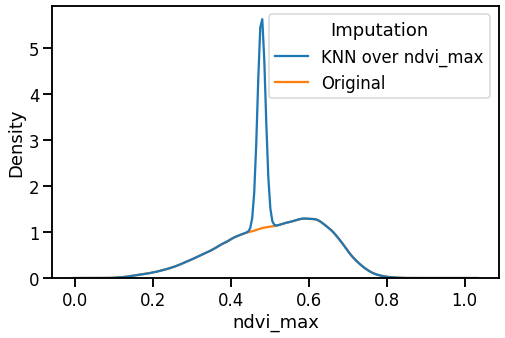

In [84]:
df_imp_ndvi = df_interest_D3.ndvi_max.to_frame()
df_imp_ndvi['Imputation'] = 'KNN over ndvi_max'
df_ndvi = df_interest_D2_spring.ndvi_max.dropna().to_frame()
df_ndvi['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi, df_ndvi], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')

- Filtrar por nubosidad:
    - < 40%

In [38]:
# Filtramos por nubosidad < 40%
df_interest_D4 = df_interest_D3[df_interest_D3['clouds_on_raster']<0.4]
print(len(df_interest_D4))

117969


- __NORMALIZACION__

In [39]:
# Aplicamos a todas las columnas una estandarización de tipo Min Max Scaler. Este transforma las características 
# escalándolas a un rango dado, por defecto (0,1). Este tipo de escalado suele denominarse frecuentemente "normalización"

from sklearn.preprocessing import MinMaxScaler
estandarizador = MinMaxScaler()
estandarizador.fit(df_interest_D4[cols])
df_interest_D4.loc[:, cols] = estandarizador.transform(df_interest_D4[cols])
df_interest_D4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,...,outl_B02_winter,outl_B02_spring,outl_B06_summer,outl_B06_autumn,outl_B06_winter,outl_B06_spring,outl_B11_summer,outl_B11_autumn,outl_B11_winter,outl_B11_spring
0,0.132107,0.473099,0.400782,605976736,2017-01-03,0.590913,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.187586,0.686541,0.574185,559322368,2017-01-03,0.589940,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.222192,0.672076,0.553846,559322369,2017-01-03,0.580665,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.225762,0.804375,0.606910,559328111,2017-01-03,0.636115,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.274375,0.810019,0.666232,559328112,2017-01-03,0.577276,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.221093,0.494620,0.405476,307532496,2022-04-17,0.513365,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,...,0,0,0,0,0,0,0,0,0,0
208928,0.352650,0.611572,0.623598,307535460,2022-04-17,0.428595,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,...,0,0,0,0,0,0,0,0,0,0
208929,0.185663,0.561827,0.491004,307796387,2022-04-17,0.516332,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,...,0,0,0,0,0,0,0,0,0,0
208930,0.292502,0.507321,0.574967,307097955,2022-04-17,0.479094,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,...,0,0,0,0,0,0,0,0,0,0


- Grabar los datos transformados

In [43]:
# Aquí está faltando el paso de grabar los resultados

## Sugerencia

Considere cada paso de la receta como una función. Es decir al finalizar una receta tendra tantas funciones como pasos. Esto le va a permitir reordenar y reutilizar las mismas sin necesidad de reescribir ningun codigo extra. Esto le sera particularmente util para una de las preguntas de la siguiente sección.


## Recetas + Comparativa

Una vez generadas las recetas se debera generar una suerte de tabla comparativa entre las mismas, poniendo de relevancia la cantidad de datos desechados/recuperados en cada instancia. _Note que todos las recetas tienen un mismo eje_.

¿Cual es su percepcion de como resultaran cada una de las recetas en un algoritmo de aprendizaje?

¿Que pasa si en la receta [C] o [D] primero filtra por nubosidad y despues remueve outliers? Considere esto como variante y definalo como [C-1] y [C-2] ([D-1]/[D-2]).

In [41]:
# Tabla comparativa

# Percepción de como resultaran cada una de las recetas en un algoritmo de aprendizaje

# Respuesta a ¿Qué pasa si en la receta [C] o [D] primero filtra por nubosidad y después remueve outliers?

## __Extra__

Generar alguna receta alternativa, basada en las propuestas mencionadas (o alguna completamente diferente :-) ).

### Receta [Extra] = Normalizacion + Filtrado Por  10% de Nubosidad + Imputacion Estacional

#CONSULTA
##CONSULTAR SI CONVIENE HACER ANTES DE LA IMPUTACIÓN EL FILTRADO POR NUBOSIDAD O DESPUÉS. 
## LOS DOS CASOS ESTAN HECHOS

##1- Descarga del dataset

In [40]:
import pandas as pd  

if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    # running on colab
    # from link @ https://github.com/felixlapalma/monitoreo-espacios-verdes-diplo202X/blob/main/data/ab-initio-dataset-build.md
    !gdown https://drive.google.com/file/d/1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd/view?usp=sharing --fuzzy
    # Notar el cambio del path y el tipo de archivo (no lo descomprimimos)
    df_=pd.read_csv('/content/espacios-verdes-indexs-cba-20170101-20220420.zip',index_col=0)
else:
    # recuerde descargar el dataset desde los links mencionados en el README
    df_=pd.read_csv('../data/cba/espacios-verdes-indexs-cba-20170101-20220420.csv',index_col=0)

Running on CoLab
Downloading...
From: https://drive.google.com/uc?id=1tgbIQaEXzIghcFYyd2YM9iMho4TDHHFd
To: /content/espacios-verdes-indexs-cba-20170101-20220420.zip
100% 170M/170M [00:03<00:00, 47.9MB/s]


##2- Obtención del dataframe

In [49]:
df_=pd.read_csv("/content/espacios-verdes-indexs-cba-20170101-20220420.zip", index_col=0)
df_

,B02_min,B02_max,B02_mean,B02_median,B02_nodata,B02_range,B02_count,B03_min,B03_max,B03_mean,...,sipi_median,sipi_nodata,sipi_range,sipi_count,raster,clouds_on_raster,osm_id,name,area_m2,date
0,0.0871,0.1421,0.102570,0.09650,0.0,0.0550,47,0.0768,0.1516,0.098885,...,0.884216,0.0,0.453065,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,605976736,NaN,4650.710032,2017-01-03
1,0.0970,0.1936,0.118354,0.10660,0.0,0.0966,13,0.1006,0.1949,0.122154,...,0.971875,0.0,0.247045,13,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322368,NaN,1502.000513,2017-01-03
2,0.0992,0.1273,0.111805,0.11290,0.0,0.0281,19,0.1037,0.1369,0.117795,...,0.973017,0.0,0.207006,19,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559322369,NaN,2004.192528,2017-01-03
3,0.0995,0.1933,0.118491,0.11355,0.0,0.0938,66,0.0993,0.1990,0.124512,...,0.966202,0.0,0.258424,66,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328111,NaN,6940.507640,2017-01-03
4,0.1059,0.1385,0.122453,0.12240,0.0,0.0326,47,0.1036,0.1580,0.132455,...,0.993986,0.0,0.260419,47,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,559328112,NaN,4587.356048,2017-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.0990,0.1684,0.115990,0.11270,0.0,0.0694,31,0.0862,0.1627,0.107387,...,0.892669,0.0,0.545993,31,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307532496,NaN,3824.467794,2022-04-17
208928,0.1145,0.3240,0.149746,0.13665,0.0,0.2095,80,0.0977,0.3363,0.149332,...,1.084102,0.0,2.805242,80,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307535460,Plaza Exodo Jujeño,7184.535857,2022-04-17
208929,0.0993,0.1388,0.110870,0.10625,0.0,0.0395,10,0.0930,0.1473,0.106160,...,0.914887,0.0,0.199024,10,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307796387,NaN,1147.997645,2022-04-17
208930,0.0991,0.1407,0.124008,0.12570,0.0,0.0416,53,0.0852,0.1377,0.118574,...,0.991200,0.0,0.299910,53,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,307097955,NaN,5185.690046,2022-04-17


##3- Extracción de columnas de interés

In [54]:
# Creamos un nuevo dataframe con las variables de interés 
df_interest_E = df_[["B02_median", "B06_median", "B11_median","osm_id", "date", "ndvi_max", "area_m2","raster","clouds_on_raster"]]
len(df_interest_E)

208932

##4- Remoción de Outliers (a nivel estacional - SIN refinar por año)

In [55]:
# Para la remoción de outliers por estación, definimos la estación a la que corresponde cada registro. 
# Convertimos la columna date a tipo datetime
df_interest_E['date']= pd.to_datetime(df_interest_E['date'])

# Extraemos el mes de cada registro.
df_interest_E['month'] = df_interest_E['date'].dt.month

# Aplicamos la siguiente función para determinar la estación a la que corresponde cada registro.
def seasons(df, col):
    Seasons = []
    for month in df[col]:
        if month in (1, 2, 3):
            season = 'summer'
        elif month in (4, 5, 6):
            season = 'autumn'
        elif month in (7, 8, 9):
            season = 'winter'
        else:
            season = 'spring'
        Seasons.append(season)
    df["season"]= Seasons

seasons(df_interest_E, "month")
df_interest_E

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,season
0,0.09650,0.19910,0.18770,605976736,2017-01-03,0.630881,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
1,0.10660,0.25960,0.25420,559322368,2017-01-03,0.630041,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
2,0.11290,0.25550,0.24640,559322369,2017-01-03,0.622036,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
3,0.11355,0.29300,0.26675,559328111,2017-01-03,0.669891,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
4,0.12240,0.29460,0.28950,559328112,2017-01-03,0.619112,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,summer
...,...,...,...,...,...,...,...,...,...,...,...
208927,0.11270,0.20520,0.18950,307532496,2022-04-17,0.563955,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208928,0.13665,0.23835,0.27315,307535460,2022-04-17,0.490798,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208929,0.10625,0.22425,0.22230,307796387,2022-04-17,0.566516,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn
208930,0.12570,0.20880,0.25450,307097955,2022-04-17,0.534379,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,autumn


In [57]:
# Generamos nuevas columnas de cada banda para cada estación
df_interest_E.loc[df_interest_E['season'] == 'summer', 'B02_summer'] = df_interest_E['B02_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B02_autumn'] = df_interest_E['B02_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B02_winter'] = df_interest_E['B02_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B02_spring'] = df_interest_E['B02_median']

df_interest_E.loc[df_interest_E['season'] == 'summer', 'B06_summer'] = df_interest_E['B06_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B06_autumn'] = df_interest_E['B06_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B06_winter'] = df_interest_E['B06_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B06_spring'] = df_interest_E['B06_median']

df_interest_E.loc[df_interest_E['season'] == 'summer', 'B11_summer'] = df_interest_E['B11_median']  
df_interest_E.loc[df_interest_E['season'] == 'autumn', 'B11_autumn'] = df_interest_E['B11_median']
df_interest_E.loc[df_interest_E['season'] == 'winter', 'B11_winter'] = df_interest_E['B11_median']
df_interest_E.loc[df_interest_E['season'] == 'spring', 'B11_spring'] = df_interest_E['B11_median']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [58]:
# Creamos lista de nuevas columnas para usarla como argumento en la función que detecta outliers
Season_values = ['B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']

In [59]:
def find_outliers(df, col_list):
    # calculamos cuartiles 1 y 3, y el interquartil (iqr)
    for col in col_list:
        if col=="NaN":
            continue
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1 
        # calculamos límite superior e inferior
        ls = q1 + 1.5 * iqr
        li = q3 - 1.5 * iqr
        # Generamos nueva columna
        df['outl_'+col]=  np.where((df[col] >ls)| (df[col] < li),1,0)

In [60]:
# Aplicamos la función de detección de outliers
find_outliers(df_interest_E, Season_values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [62]:
# Se quitan aquellos registros donde se observa que para las tres bandas bajo análisis (en cada estación), 
# los valores son outliers (valor = 1)
df_interest_E2_summer = df_interest_E[~((df_interest_E['outl_B02_summer']==1) & (df_interest_E['outl_B06_summer']==1) & 
                        (df_interest_E['outl_B11_summer']==1))]
print(len(df_interest_E2_summer))

df_interest_E2_autumn = df_interest_E2_summer[~((df_interest_E['outl_B02_autumn']==1) & 
                        (df_interest_E2_summer['outl_B06_autumn']==1) & (df_interest_E2_summer['outl_B11_autumn']==1))]
print(len(df_interest_E2_autumn))

df_interest_E2_winter = df_interest_E2_autumn[~((df_interest_E['outl_B02_winter']==1) & 
                        (df_interest_E2_autumn['outl_B06_winter']==1) & (df_interest_E2_autumn['outl_B11_winter']==1))]
print(len(df_interest_E2_winter))

df_interest_E2_spring = df_interest_E2_winter[~((df_interest_E['outl_B02_spring']==1) & 
                        (df_interest_E2_winter['outl_B06_spring']==1) & (df_interest_E2_winter['outl_B11_spring']==1))]
print(len(df_interest_E2_spring))

205669


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


202722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


200130


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


197680


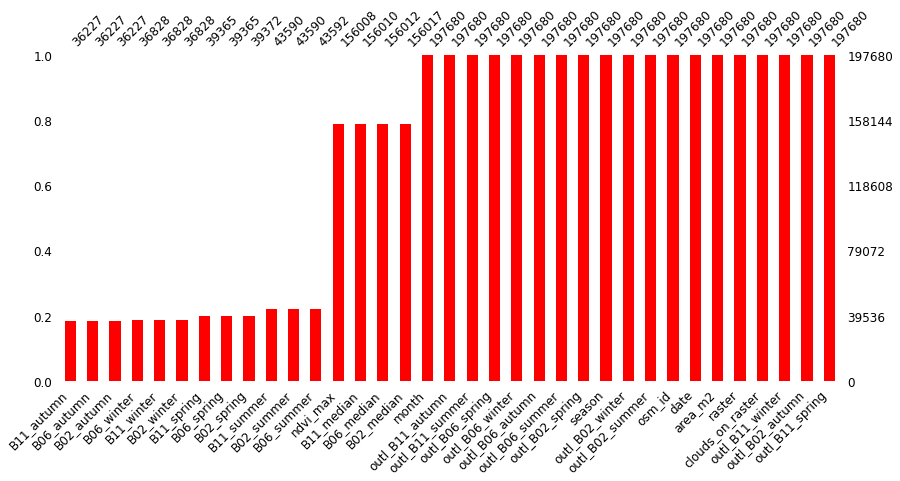

In [64]:
msno.bar(df_interest_E2_spring,figsize=(14, 6), sort="ascending",fontsize=12, color='red')

##5- Normalización
Utilizamos el objeto scikit-learn MinMaxScaler para escalar los datos, debido a que imputaremos por los K-vecinos más cercanos. Dicho algoritmo utiliza medidas de distancias y se ve afectado por la escala de las variables de entrada.

In [65]:
from sklearn.preprocessing import MinMaxScaler
estandarizador = MinMaxScaler()
estandarizador.fit(df_interest_E2_spring[cols])
df_interest_E2_spring.loc[:, cols] = estandarizador.transform(df_interest_E2_spring[cols])
df_interest_E2_spring

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,B02_median,B06_median,B11_median,osm_id,date,ndvi_max,area_m2,raster,clouds_on_raster,month,...,outl_B02_winter,outl_B02_spring,outl_B06_summer,outl_B06_autumn,outl_B06_winter,outl_B06_spring,outl_B11_summer,outl_B11_autumn,outl_B11_winter,outl_B11_spring
0,0.058466,0.439953,0.414224,605976736,2017-01-03,0.620063,4650.710032,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.083019,0.619132,0.583737,559322368,2017-01-03,0.619198,1502.000513,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.098335,0.606989,0.563854,559322369,2017-01-03,0.610947,2004.192528,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.099915,0.718051,0.615728,559328111,2017-01-03,0.660273,6940.507640,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,...,0,0,1,0,0,0,0,0,0,0
4,0.121429,0.722790,0.673719,559328112,2017-01-03,0.607932,4587.356048,S2A_MSIL1C_20170103T142022_N0204_R010_T20JLL_2...,0.0,1,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208927,0.097849,0.458019,0.418812,307532496,2022-04-17,0.551080,3824.467794,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,...,0,0,0,0,0,0,0,0,0,0
208928,0.156071,0.556197,0.632042,307535460,2022-04-17,0.475674,7184.535857,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,...,0,0,0,0,0,0,0,0,0,0
208929,0.082168,0.514438,0.502422,307796387,2022-04-17,0.553720,1147.997645,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,...,0,0,0,0,0,0,0,0,0,0
208930,0.129452,0.468681,0.584502,307097955,2022-04-17,0.520595,5185.690046,S2A_MSIL1C_20220417T141741_N0400_R010_T20JLL_2...,0.0,4,...,0,0,0,0,0,0,0,0,0,0


##6- Aplicación de filtro por 10% de nubosidad

In [67]:
# Filtramos por nubosidad < 10%
df_interest_EN = df_interest_E2_spring[df_interest_E2_spring['clouds_on_raster']<0.1]
print(len(df_interest_EN))

112807


##7- Imputación
Imputamos valores nulos de todas las columnas bajo el criterio del K-vecino más cercano

In [82]:
cols = ['ndvi_max', 'B02_median', 'B06_median', 'B11_median', 'B02_summer', 'B02_autumn', 'B02_winter', 'B02_spring', 'B06_summer', 'B06_autumn', 'B06_winter', 
                'B06_spring', 'B11_summer', 'B11_autumn', 'B11_winter', 'B11_spring']
#df_interest_EI = df_interest_EN.copy()
df_interest_EI = df_interest_E2_spring

kn_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
df_interest_EI[cols] = kn_imputer.fit_transform(df_interest_EI[cols])

# Podemos graficar como quedaron todas las columnas imputadas pero hay que tener en cuenta que tarda en correr
# msno.bar(df_interest_D3,figsize=(14, 6), sort="ascending",fontsize=12, color='lightblue')

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


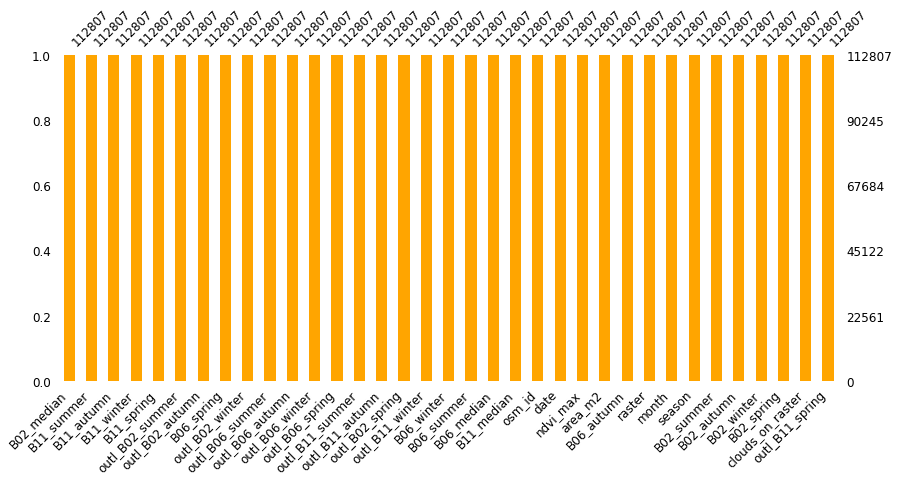

In [69]:
msno.bar(df_interest_EI,figsize=(14, 6), sort="ascending",fontsize=12, color='orange')

La siguiente gráfica muestra las funciones de distribución para la variable ndvi_max antes y después de realizar la imputación, con filtro en nubosidad.

In [72]:
import seaborn as sns
sns.set_context('talk')

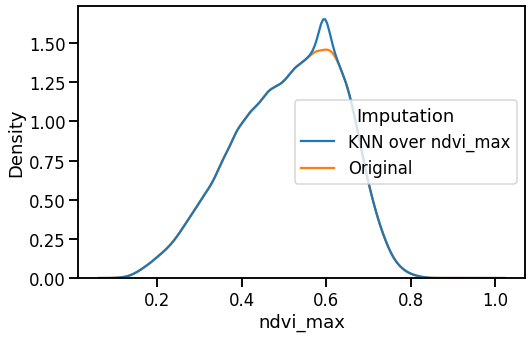

In [81]:
df_imp_ndvi = df_interest_EI.ndvi_max.to_frame()
df_imp_ndvi['Imputation'] = 'KNN over ndvi_max'
df_ndvi = df_interest_EN.ndvi_max.dropna().to_frame()
df_ndvi['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi, df_ndvi], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')

La siguiente gráfica muestra las funciones de distribución para la variable ndvi_max antes y después de realizar la imputación, sin filtro en nubosidad.

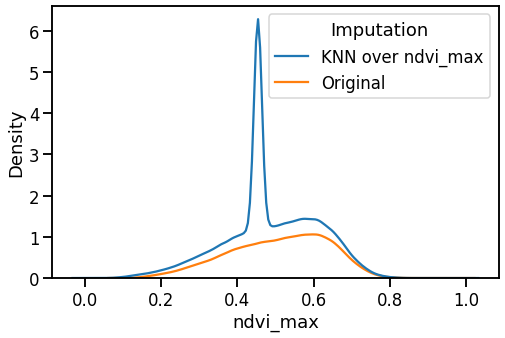

In [83]:
df_imp_ndvi = df_interest_EI.ndvi_max.to_frame()
df_imp_ndvi['Imputation'] = 'KNN over ndvi_max'
df_ndvi = df_interest_EN.ndvi_max.dropna().to_frame()
df_ndvi['Imputation'] = 'Original'
data = pd.concat([df_imp_ndvi, df_ndvi], ignore_index=True)
fig = plt.figure(figsize=(8, 5))
g = sns.kdeplot(data=data, x='ndvi_max', hue='Imputation')